<a href="https://colab.research.google.com/github/rdpambhar/Deep_Learning/blob/main/Deep_Learning/VGG16/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VGG16 Model

#### Import necessary libraries

In [35]:
import keras
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions,preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random

#### Load the pretrained VGG16 Model from Keras 

In [2]:
model=VGG16(weights='imagenet')

553476096/553467096 [==============================] - 276s 0us/step


#### Print the Pretrained Model summary

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Load the test images from the directory

In [26]:
testpath=r'Testimage/'
testimages=[]
for i in os.listdir(testpath):
    imgs=image.load_img(os.path.join(testpath,i),target_size=(224,224))
    testimages.append(imgs)


#### Visualize the loaded test images

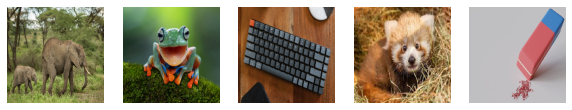

In [27]:
plt.figure(figsize=(10,10))
for i in range(0,len(testimages)):
    ax=plt.subplot(1,5,i+1)
    plt.imshow(testimages[i])
    plt.axis(False)

#### Convert test images into tensor form to predict the class

In [30]:
imgsarray=[]
for img in testimages:
    imgs=image.img_to_array(img)
    imgs=imgs.reshape(1,224,224,3)
    imgs=preprocess_input(imgs)
    imgsarray.append(imgs)

#### Print the image shape

In [33]:
imgsarray[0].shape

(1, 224, 224, 3)

#### Take the random image from test images and predict the lable for it using VGG16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Class: [('n01644373', 'tree_frog', 0.99145496), ('n01644900', 'tailed_frog', 0.00805447), ('n01641577', 'bullfrog', 0.00035695455)]


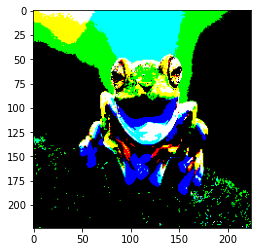

In [61]:
img_to_test=imgsarray[random.randint(0,len(testimages))]
predictions=model.predict(img_to_test)
print('Predicted Class:',decode_predictions(predictions,top=3)[0])
imagetest=img_to_test.reshape(224,224,3)
plt.imshow(imagetest)
plt.show()